In [31]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
sns.set_context('notebook')

In [2]:
dr5_c = pd.read_csv('/home/walml/repos/zoobot/current_final_dr5_result_without_metadata.csv')

In [3]:

nsa = Table.read('/media/walml/beta/galaxy_zoo/decals/catalogs/raw/nsa_v1_0_0.fits')
nsa = nsa[['RA', 'DEC', 'IAUNAME']]

nsa = nsa.to_pandas()
for col in nsa.columns.values:
    nsa[col.lower()] = nsa[col]
    del nsa[col]

nsa['iauname'] = nsa['iauname'].str.decode('utf8')

In [4]:
nsa

,ra,dec,iauname
0,146.714215,-1.041280,J094651.40-010228.5
1,146.628585,-0.765162,J094630.85-004554.5
2,146.631706,-0.988347,J094631.59-005917.7
3,146.934129,-0.670405,J094744.18-004013.4
4,146.963500,-0.544776,J094751.74-003242.0
...,...,...,...
641404,357.755712,-10.010851,J235101.08-100042.7
641405,358.197549,-10.883763,J235247.10-105259.6
641406,358.336971,-10.544118,J235320.91-103238.7
641407,358.530488,-10.405839,J235406.94-102419.7


In [5]:
nsa_classified = pd.merge(nsa, dr5_c, on='iauname', how='inner')

In [6]:
nsa_classified['high_retirement'] = nsa_classified['smooth-or-featured_total-votes'] > 37

In [7]:
nsa_classified = nsa_classified.reset_index(drop=True)

In [8]:
nsa_classified['upload_group'].value_counts()

active_baseline    192496
pre_active          50946
active_priority      6939
calibration          1594
targeted             1250
Name: upload_group, dtype: int64

(array([6035., 3268., 1527., 3568., 3114., 1774.,  723.,  186.,  263.,
        1237., 1668., 1579.,  364.,  116.,  179.,  138.,  216.,  166.,
         182.,  162.,  179.,  143.,  130.,  136.,  169.,  158.,  138.,
         139.,  163.,  224.,  202.,  192.,  171.,  175.,  171.,  231.,
         219.,  169.,  177.,  207.]),
 array([     0.   ,   6330.025,  12660.05 ,  18990.075,  25320.1  ,
         31650.125,  37980.15 ,  44310.175,  50640.2  ,  56970.225,
         63300.25 ,  69630.275,  75960.3  ,  82290.325,  88620.35 ,
         94950.375, 101280.4  , 107610.425, 113940.45 , 120270.475,
        126600.5  , 132930.525, 139260.55 , 145590.575, 151920.6  ,
        158250.625, 164580.65 , 170910.675, 177240.7  , 183570.725,
        189900.75 , 196230.775, 202560.8  , 208890.825, 215220.85 ,
        221550.875, 227880.9  , 234210.925, 240540.95 , 246870.975,
        253201.   ]),
 <a list of 40 Patch objects>)

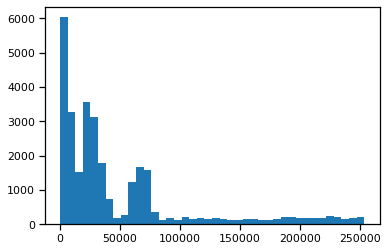

In [9]:
plt.hist(nsa_classified[nsa_classified['high_retirement']].index.values, bins=40)

(array([5.909e+03, 3.263e+03, 1.490e+03, 3.438e+03, 3.088e+03, 1.719e+03,
        6.110e+02, 1.600e+01, 1.500e+02, 1.110e+03, 1.598e+03, 1.547e+03,
        2.350e+02, 8.000e+00, 1.000e+01, 3.000e+00, 2.000e+01, 1.400e+01,
        1.600e+01, 1.800e+01, 1.000e+01, 1.400e+01, 8.000e+00, 1.000e+01,
        2.100e+01, 1.900e+01, 8.000e+00, 1.800e+01, 9.000e+00, 2.600e+01,
        2.400e+01, 1.100e+01, 2.700e+01, 1.300e+01, 1.000e+00, 3.000e+00,
        1.800e+01, 8.000e+00, 1.200e+01, 1.900e+01]),
 array([     0.   ,   6329.525,  12659.05 ,  18988.575,  25318.1  ,
         31647.625,  37977.15 ,  44306.675,  50636.2  ,  56965.725,
         63295.25 ,  69624.775,  75954.3  ,  82283.825,  88613.35 ,
         94942.875, 101272.4  , 107601.925, 113931.45 , 120260.975,
        126590.5  , 132920.025, 139249.55 , 145579.075, 151908.6  ,
        158238.125, 164567.65 , 170897.175, 177226.7  , 183556.225,
        189885.75 , 196215.275, 202544.8  , 208874.325, 215203.85 ,
        221533.375, 227862

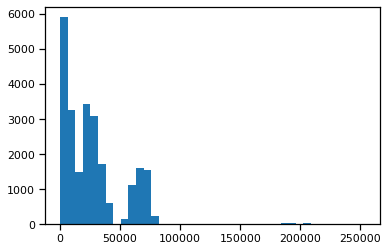

In [10]:
plt.hist(nsa_classified[nsa_classified['upload_group'].isin(['pre_active', 'targeted'])].query('high_retirement').index.values, bins=40)

(array([619., 764., 761., 760., 750., 743., 738., 609., 594., 456., 504.,
        557., 526., 296., 380.,  97.,  29.,   8.,  10.,   9.,  23., 540.,
        318., 249., 410.,  40.,  16., 532., 563., 529., 555., 552., 572.,
        565., 546., 557., 524., 163., 196., 241., 246., 187., 197., 209.,
        292., 265., 187., 180., 180.,  88.,  57., 166., 169., 166.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  54.,  92.,   0.,   0.,   0.,   0.,   0.,  20., 185.,
        195., 165., 140., 152., 174., 181., 220., 215., 280.,  20., 207.,
        202., 219., 174., 119., 142., 174., 207., 220., 208., 210., 218.,
        213.]),
 array([    0.  ,   767.99,  1535.98,  2303.97,  3071.96,  3839.95,
         4607.94,  5375.93,  6143.92,  6911.91,  7679.9 ,  8447.89,
         9215.88,  9983.87, 10751.86, 11519.85, 12287.84, 13055.83,
        13823.82, 14591.81, 15359.8 , 16127.79, 16895.78, 17663.77,
        18431.76, 19199.75, 19967.74, 20735.73

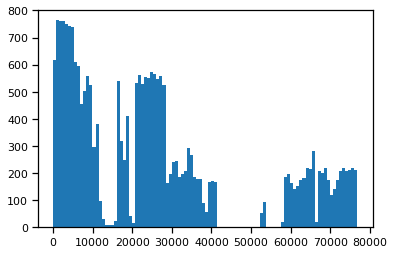

In [11]:
plt.hist(nsa_classified[nsa_classified['upload_group'].isin(['pre_active'])].query('high_retirement').index.values, bins=100)

In [12]:
# broadly, galaxies from 0-42k and 57k-73k were uploaded and classified to N=40, and the rest were not (N=5)
# getting the exact numbers:
random = nsa_classified[nsa_classified['upload_group'].isin(['pre_active'])]

In [13]:
# <= 41442
random.iloc[35460:35490]['high_retirement']

41402    False
41403    False
41404    False
41405     True
41406    False
41407    False
41408     True
41409    False
52772    False
52773    False
52774    False
52775    False
52776    False
52777    False
52778    False
52779     True
52780    False
52781     True
52782     True
52783    False
52784    False
52785     True
52786    False
52787    False
52788    False
52789     True
52790    False
52791    False
52792    False
52793     True
Name: high_retirement, dtype: bool

In [14]:
# >= 54615, except for a little spike near 5k
random.iloc[35960:35980]['high_retirement']

53268     True
53269     True
53270    False
53271     True
53272    False
53273    False
53274    False
53275    False
58294    False
58295     True
58296    False
58297    False
58298    False
58299    False
58300    False
58301    False
58302    False
58303     True
58304    False
58305    False
Name: high_retirement, dtype: bool

In [15]:
# <=72710
random.index.values.max()

76801

In [39]:
targeted = nsa_classified[nsa_classified['upload_group'].isin(['targeted'])]  # index not reset, important

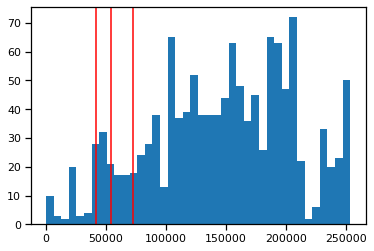

In [40]:
plt.hist(targeted.index.values, bins=40)
plt.axvline(41442, color='r')
plt.axvline(54615, color='r')
plt.axvline(72710, color='r')

In [41]:
would_have_included = (targeted.index.values <= 41442) | ( (targeted.index.values >= 54615) & (targeted.index.values < 72710))
len(targeted), would_have_included.sum(), would_have_included.mean()

(1250, 105, 0.084)

In [42]:
len(targeted) - would_have_included.sum()

1145

In [43]:
with open('targeted_galaxies_would_include.json', 'w') as f:
    json.dump(list(targeted[would_have_included]['iauname']), f)

In [44]:
calibration = nsa_classified[nsa_classified['upload_group'].isin(['calibration'])]

In [45]:
would_have_included = (calibration.index.values <= 41442) | ( (calibration.index.values >= 54615) & (calibration.index.values < 72710))
len(calibration), would_have_included.sum(), would_have_included.mean()

(1594, 943, 0.5915934755332497)

In [46]:
len(calibration) - would_have_included.sum()

651

In [47]:
with open('calibration_galaxies_would_include.json', 'w') as f:
    json.dump(list(calibration[would_have_included]['iauname']), f)

In [48]:
!pwd

/home/walml/repos/zoobot/notebooks/catalogs
